In [21]:
import polars as pl

# Read the parquet file
df_consolidado = pl.read_parquet("../data/consolidado/df_consolidado.parquet")

# Show first 5 rows
df_consolidado.head()


CODIGO_ANONIMIZADO,SEXO,EDAD,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,NIVEL_ESTABLECIMIENTO_PRINCIPAL,TOTAL_DIAS_HOSPITALIZACION,TOTAL_GASTO_MEDICAMENTOS,TOTAL_ATENCIONES,ULTIMA_ATENCION,FALLECIDO,TIENE_DIABETES,HOSPITALIZADO_ALGUNA_VEZ,TIPO_DIABETES_PRINCIPAL,PRINCIPAL_CODIGO_CONSUMO,PRINCIPAL_NOMBRE_CONSUMO,FECHA_NACIMIENTO_DATE,ANIO_NAC,GRUPO_ETARIO
str,str,i64,datetime[μs],datetime[μs],i64,str,str,str,i64,i64,f64,u32,datetime[μs],i8,i8,i8,str,i64,str,date,i32,str
"""000015CA7003D37272A17DE250F6AF…","""MASCULINO""",73,1948-09-24 00:00:00,null,70101,"""CALLAO""","""PROV. CONST. DEL CALLAO""","""CALLAO""",1,0,5.4,36,2022-04-13 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4696,"""METFORMINA CLORHIDRATO""",1948-09-24,1948,"""Adulto mayor"""
"""0000F157F4A508199E7AB5BC2C578C…","""FEMENINO""",62,1960-04-19 00:00:00,null,150112,"""LIMA""","""LIMA""","""INDEPENDENCIA""",1,0,0.0,42,2022-05-19 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4034,"""IBUPROFENO""",1960-04-19,1960,"""Adulto"""
"""000108D3721EF356AB8A6AB2A8B8BF…","""FEMENINO""",69,1952-12-20 00:00:00,2022-08-05 00:00:00,120701,"""JUNÃN""","""TARMA""","""TARMA""",2,0,10.1,23,2022-06-16 00:00:00,1,1,0,"""DIABETES MELLITUS TIPO 2""",3718,"""GABAPENTINA""",1952-12-20,1952,"""Adulto mayor"""
"""00011E4AD59AA9D1B25078C9508FF0…","""FEMENINO""",31,1991-01-31 00:00:00,null,150507,"""LIMA""","""CAÃETE""","""IMPERIAL""",1,0,0.0,11,2022-08-11 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4034,"""IBUPROFENO""",1991-01-31,1991,"""Joven-adulto"""
"""000138461C3A7C68629B8C5ADAA075…","""MASCULINO""",64,1957-10-07 00:00:00,null,150103,"""LIMA""","""LIMA""","""ATE""",1,0,1.2,7,2022-02-10 00:00:00,0,1,0,"""DIABETES MELLITUS NO ESPECIFIC…",4696,"""METFORMINA CLORHIDRATO""",1957-10-07,1957,"""Adulto"""


In [20]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar datos (ejemplo)
# df = pl.read_csv("datos_diabetes.csv")

# Seleccionar variables relevantes
features = [
    "SEXO", "EDAD", "TOTAL_DIAS_HOSPITALIZACION", 
    "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ", "TIPO_DIABETES_PRINCIPAL", 
    "GRUPO_ETARIO"
]

target = "FALLECIDO"

# Filtrar y limpiar
df_modelo = df_consolidado.select([*features, target]).drop_nulls()

In [21]:
# Convertir a Pandas para procesamiento
df_pd = df_modelo.to_pandas()

# Definir preprocesamiento
categorical_cols = ["SEXO", "TIPO_DIABETES_PRINCIPAL", "GRUPO_ETARIO"]
numeric_cols = ["EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [22]:
# Dividir datos
X = df_pd[features]
y = df_pd[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesar y entrenar
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [23]:
# Predecir
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

# Métricas
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    174446
           1       0.31      0.14      0.19      8104

    accuracy                           0.95    182550
   macro avg       0.63      0.56      0.58    182550
weighted avg       0.93      0.95      0.94    182550

AUC-ROC: 0.83


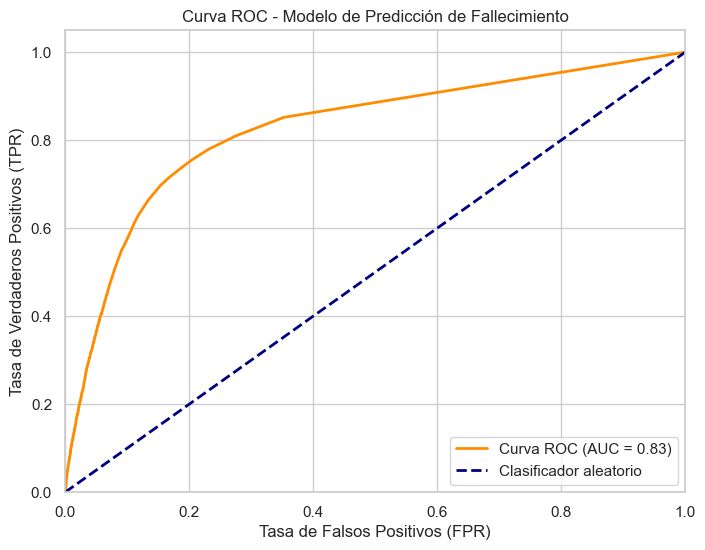

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular métricas ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo de Predicción de Fallecimiento')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SMOTE

In [1]:
pip install --upgrade --force-reinstall imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl (13.1 MB)
  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl (38.6 MB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting u


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import polars as pl
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar datos (ejemplo)
# df_consolidado = pl.read_csv("tu_archivo.csv")

# Seleccionar variables relevantes
features = [
    "SEXO", "EDAD", "TOTAL_DIAS_HOSPITALIZACION", 
    "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ", "TIPO_DIABETES_PRINCIPAL", 
    "GRUPO_ETARIO"
]
target = "FALLECIDO"

# Convertir a Pandas para SMOTE (imblearn funciona con Pandas/NumPy)
df_pd = df_consolidado.select([*features, target]).to_pandas()

# Preprocesamiento: Codificar variables categóricas
categorical_cols = ["SEXO", "TIPO_DIABETES_PRINCIPAL", "GRUPO_ETARIO"]
numeric_cols = ["EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Aplicar preprocesamiento
X = df_pd[features]
y = df_pd[target]
X_processed = preprocessor.fit_transform(X)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Verificar balanceo
print("Distribución original:", y.value_counts())
print("Distribución después de SMOTE:", pd.Series(y_resampled).value_counts())

Distribución original: FALLECIDO
0    581006
1     27492
Name: count, dtype: int64
Distribución después de SMOTE: FALLECIDO
0    581006
1    581006
Name: count, dtype: int64


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Dividir datos balanceados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    174498
           1       0.98      0.96      0.97    174106

    accuracy                           0.97    348604
   macro avg       0.97      0.97      0.97    348604
weighted avg       0.97      0.97      0.97    348604



In [22]:
import polars as pl

# Filtrar pacientes fallecidos
fallecidos_df = df_consolidado.filter(pl.col("FALLECIDO") == 1)

In [23]:
import pandas as pd

# Convertir a pandas para usar scikit-learn
fallecidos_pd = fallecidos_df.to_pandas()

# Codificar SEXO y TIPO_DIABETES_PRINCIPAL
fallecidos_pd["SEXO_NUM"] = fallecidos_pd["SEXO"].map({"MASCULINO": 1, "FEMENINO": 0})
fallecidos_pd["TIPO_DIABETES_NUM"] = fallecidos_pd["TIPO_DIABETES_PRINCIPAL"].astype("category").cat.codes

# Variables finales
features = fallecidos_pd[[
    "EDAD",
    "SEXO_NUM",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
    "NIVEL_ESTABLECIMIENTO_PRINCIPAL",
    "HOSPITALIZADO_ALGUNA_VEZ",
    "TIPO_DIABETES_NUM"
]]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Añadir los clusters al DataFrame
fallecidos_pd["CLUSTER"] = clusters


In [30]:
# Ver distribución de clusters
print(fallecidos_pd["CLUSTER"].value_counts())

# Ver promedios por cluster
print(fallecidos_pd.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ"
]].mean())


CLUSTER
1    8098
2    6812
0    5496
3    2712
Name: count, dtype: int64
              EDAD  TOTAL_DIAS_HOSPITALIZACION  TOTAL_GASTO_MEDICAMENTOS  \
CLUSTER                                                                    
0        69.260553                    0.028748                 57.553228   
1        69.082736                  701.514325               1911.506652   
2        67.438050                  728.670875               1997.406207   
3        62.842552                 3395.210914               8486.734126   

         TOTAL_ATENCIONES  HOSPITALIZADO_ALGUNA_VEZ  
CLUSTER                                              
0               20.559862                  0.000364  
1               96.578167                  0.995554  
2               95.005432                  0.995596  
3              265.973820                  0.998525  


In [31]:
import polars as pl

# Ordenar por TOTAL_DIAS_HOSPITALIZACION de forma ascendente
df_ordenado = df_consolidado.sort("TOTAL_DIAS_HOSPITALIZACION", descending=True)

# Mostrar los primeros registros ordenados
df_ordenado.head(10)


CODIGO_ANONIMIZADO,SEXO,EDAD,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,NIVEL_ESTABLECIMIENTO_PRINCIPAL,TOTAL_DIAS_HOSPITALIZACION,TOTAL_GASTO_MEDICAMENTOS,TOTAL_ATENCIONES,ULTIMA_ATENCION,FALLECIDO,TIENE_DIABETES,HOSPITALIZADO_ALGUNA_VEZ,TIPO_DIABETES_PRINCIPAL,PRINCIPAL_CODIGO_CONSUMO,PRINCIPAL_NOMBRE_CONSUMO,FECHA_NACIMIENTO_DATE,ANIO_NAC,GRUPO_ETARIO
str,str,i64,datetime[μs],datetime[μs],i64,str,str,str,i64,i64,f64,u32,datetime[μs],i8,i8,i8,str,i64,str,date,i32,str
"""B46CA9ACFDD5E91A74A2095D67305C…","""MASCULINO""",54,1968-01-30 00:00:00,null,150141,"""LIMA""","""LIMA""","""SURQUILLO""",3,16564,45281.123,641,2023-01-20 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",90784,"""InyecciÃ³n profilÃ¡ctica diag…",1968-01-30,1968,"""Adulto"""
"""9452D4F1E9FABB47E76109EA389199…","""FEMENINO""",62,1961-07-01 00:00:00,2023-07-07 00:00:00,150142,"""LIMA""","""LIMA""","""VILLA EL SALVADOR""",2,16043,36167.13,866,2023-07-07 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",22291,"""OXIGENO MEDICINAL""",1961-07-01,1961,"""Adulto"""
"""FF96A6D9E738ADAFEBB4EB644FBA33…","""MASCULINO""",23,2000-01-26 00:00:00,2023-03-25 00:00:00,220901,"""SAN MARTÃN""","""SAN MARTÃN""","""TARAPOTO""",2,15831,46327.73,791,2023-03-25 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",8140,"""OXIGENO MEDICINAL""",2000-01-26,2000,"""Joven-adulto"""
"""C1E1E68B6AB428DEE09C0811364EA7…","""FEMENINO""",63,1959-12-24 00:00:00,null,100101,"""HUÃNUCO""","""HUÃNUCO""","""HUANUCO""",2,14126,43143.074,1084,2023-09-04 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",8140,"""OXIGENO MEDICINAL""",1959-12-24,1959,"""Adulto"""
"""ECBBE7D159F376229F090EE6BF7BA7…","""MASCULINO""",4,2019-06-28 00:00:00,null,150130,"""LIMA""","""LIMA""","""SAN BORJA""",3,12493,24188.555,618,2023-07-28 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",22291,"""OXIGENO MEDICINAL""",2019-06-28,2019,"""Menor de edad"""
"""7C95B40ED5C2253E0BC9C6A41DF20A…","""FEMENINO""",62,1960-12-10 00:00:00,2023-03-15 00:00:00,50101,"""AYACUCHO""","""HUAMANGA""","""AYACUCHO""",2,11985,26318.686,797,2023-03-15 00:00:00,1,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",22291,"""OXIGENO MEDICINAL""",1960-12-10,1960,"""Adulto"""
"""42DD17C602C032DFBC9CBEB7FD7FD5…","""FEMENINO""",48,1974-05-14 00:00:00,2022-10-19 00:00:00,50101,"""AYACUCHO""","""HUAMANGA""","""AYACUCHO""",2,11729,26490.067,767,2022-10-12 00:00:00,1,1,1,"""OTRAS DIABETES MELLITUS ESPECI…",22291,"""OXIGENO MEDICINAL""",1974-05-14,1974,"""Adulto"""
"""3920E0970650F5B7938B1E200ED711…","""FEMENINO""",72,1950-08-26 00:00:00,null,160108,"""LORETO""","""MAYNAS""","""PUNCHANA""",3,11374,18948.739,657,2022-10-09 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",8140,"""OXIGENO MEDICINAL""",1950-08-26,1950,"""Adulto mayor"""
"""32D1D7A04FD3EF9B831206B8D4D8BB…","""FEMENINO""",68,1954-05-07 00:00:00,null,150133,"""LIMA""","""LIMA""","""SAN JUAN DE MIRAFLORES""",3,11079,16960.836,468,2023-01-05 00:00:00,0,1,1,"""DIABETES MELLITUS TIPO 2""",8140,"""OXIGENO MEDICINAL""",1954-05-07,1954,"""Adulto mayor"""


C:\Users\quine\AppData\Local\Temp\ipykernel_14096\1365945421.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


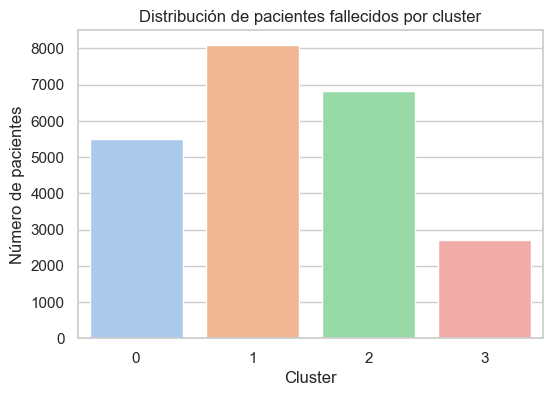

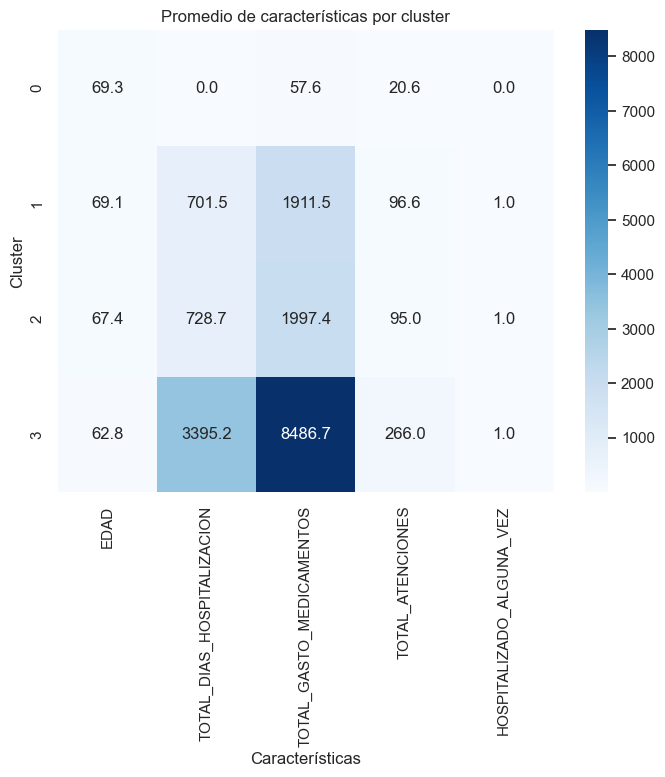

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# ===========================
# 📊 Gráfico de barras: cantidad de pacientes por cluster
# ===========================
cluster_counts = fallecidos_pd["CLUSTER"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Número de pacientes")
plt.title("Distribución de pacientes fallecidos por cluster")
plt.show()

# ===========================
# 🔥 Heatmap: promedio de características por cluster
# ===========================
cluster_means = fallecidos_pd.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ"
]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="Blues", fmt=".1f")
plt.title("Promedio de características por cluster")
plt.ylabel("Cluster")
plt.xlabel("Características")
plt.show()
